In [233]:
import pandas as pd
import numpy as np
from mpl_toolkits.basemap import Basemap
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

## Read datasets

In [234]:
facts = pd.read_csv('./data/county_facts.csv')
facts.area_name = facts.area_name.str.replace(' County', '')
facts = facts.rename(columns={'area_name':'county'})
facts

,fips,county,state_abbreviation,PST045214,PST040210,PST120214,POP010210,AGE135214,AGE295214,AGE775214,...,SBO415207,SBO015207,MAN450207,WTN220207,RTN130207,RTN131207,AFN120207,BPS030214,LND110210,POP060210
0,0,United States,NaN,318857056,308758105,3.3,308745538,6.2,23.1,14.5,...,8.3,28.8,5319456312,4174286516,3917663456,12990,613795732,1046363,3531905.43,87.4
1,1000,Alabama,NaN,4849377,4780127,1.4,4779736,6.1,22.8,15.3,...,1.2,28.1,112858843,52252752,57344851,12364,6426342,13369,50645.33,94.4
2,1001,Autauga,AL,55395,54571,1.5,54571,6.0,25.2,13.8,...,0.7,31.7,0,0,598175,12003,88157,131,594.44,91.8
3,1003,Baldwin,AL,200111,182265,9.8,182265,5.6,22.2,18.7,...,1.3,27.3,1410273,0,2966489,17166,436955,1384,1589.78,114.6
4,1005,Barbour,AL,26887,27457,-2.1,27457,5.7,21.2,16.5,...,0.0,27.0,0,0,188337,6334,0,8,884.88,31.0
5,1007,Bibb,AL,22506,22919,-1.8,22915,5.3,21.0,14.8,...,0.0,0.0,0,0,124707,5804,10757,19,622.58,36.8
6,1009,Blount,AL,57719,57322,0.7,57322,6.1,23.6,17.0,...,0.0,23.2,341544,0,319700,5622,20941,3,644.78,88.9
7,1011,Bullock,AL,10764,10915,-1.4,10914,6.3,21.4,14.9,...,0.0,38.8,0,0,43810,3995,3670,1,622.81,17.5
8,1013,Butler,AL,20296,20946,-3.1,20947,6.1,23.6,18.0,...,0.0,0.0,399132,56712,229277,11326,28427,2,776.83,27.0
9,1015,Calhoun,AL,115916,118586,-2.3,118572,5.7,22.2,16.0,...,0.5,24.7,2679991,0,1542981,13678,186533,114,605.87,195.7


In [235]:
election = pd.read_csv('./data/primary_results.csv')
election

,state,state_abbreviation,county,fips,party,candidate,votes,fraction_votes
0,Alabama,AL,Autauga,1001.0,Democrat,Bernie Sanders,544,0.182
1,Alabama,AL,Autauga,1001.0,Democrat,Hillary Clinton,2387,0.800
2,Alabama,AL,Baldwin,1003.0,Democrat,Bernie Sanders,2694,0.329
3,Alabama,AL,Baldwin,1003.0,Democrat,Hillary Clinton,5290,0.647
4,Alabama,AL,Barbour,1005.0,Democrat,Bernie Sanders,222,0.078
5,Alabama,AL,Barbour,1005.0,Democrat,Hillary Clinton,2567,0.906
6,Alabama,AL,Bibb,1007.0,Democrat,Bernie Sanders,246,0.197
7,Alabama,AL,Bibb,1007.0,Democrat,Hillary Clinton,942,0.755
8,Alabama,AL,Blount,1009.0,Democrat,Bernie Sanders,395,0.386
9,Alabama,AL,Blount,1009.0,Democrat,Hillary Clinton,564,0.551


### Total Votes

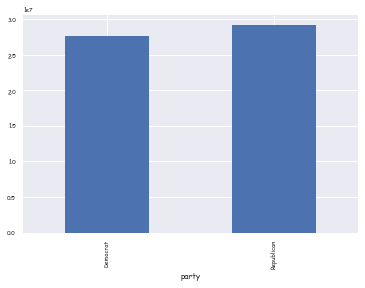

In [236]:
election.groupby('party').sum()['votes'].plot(kind='bar')

In [237]:
election.groupby(['candidate', 'party'])['votes'].sum().sort_values(ascending=False).reset_index(['candidate'])#.plot(kind='bar')

,candidate,votes
party,,
Democrat,Hillary Clinton,15692452
Republican,Donald Trump,13302541
Democrat,Bernie Sanders,11959102
Republican,Ted Cruz,7603006
Republican,John Kasich,4159949
Republican,Marco Rubio,3321076
Republican,Ben Carson,564553
Republican,Jeb Bush,94411
Republican,Chris Christie,24353


## Total States

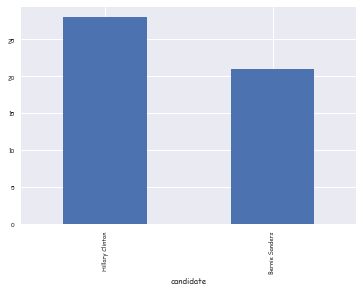

In [238]:
democrat = election[election.party == 'Democrat']
democrat_states = democrat.groupby(['state', 'candidate']).sum().reset_index()
democrat_states_winner = democrat_states.ix[democrat_states.groupby('state')['votes'].idxmax().values]
democrat_states_winner.groupby('candidate').size().sort_values(ascending=False).plot(kind='bar')

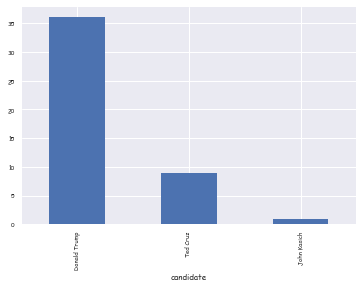

In [239]:
republican = election[election.party == 'Republican']
republican_states = republican.groupby(['state', 'candidate']).sum().reset_index()
republican_states_winner = republican_states.ix[republican_states.groupby('state')['votes'].idxmax().values]
republican_states_winner.groupby('candidate').size().sort_values(ascending=False).plot(kind='bar')

## Merged dataset

In [240]:
elect_facts = pd.merge(election, facts, on=['county', 'state_abbreviation', 'fips'])
elect_facts

,state,state_abbreviation,county,fips,party,candidate,votes,fraction_votes,PST045214,PST040210,...,SBO415207,SBO015207,MAN450207,WTN220207,RTN130207,RTN131207,AFN120207,BPS030214,LND110210,POP060210
0,Alabama,AL,Autauga,1001.0,Democrat,Bernie Sanders,544,0.182,55395,54571,...,0.7,31.7,0,0,598175,12003,88157,131,594.44,91.8
1,Alabama,AL,Autauga,1001.0,Democrat,Hillary Clinton,2387,0.800,55395,54571,...,0.7,31.7,0,0,598175,12003,88157,131,594.44,91.8
2,Alabama,AL,Autauga,1001.0,Republican,Ben Carson,1764,0.146,55395,54571,...,0.7,31.7,0,0,598175,12003,88157,131,594.44,91.8
3,Alabama,AL,Autauga,1001.0,Republican,Donald Trump,5387,0.445,55395,54571,...,0.7,31.7,0,0,598175,12003,88157,131,594.44,91.8
4,Alabama,AL,Autauga,1001.0,Republican,John Kasich,421,0.035,55395,54571,...,0.7,31.7,0,0,598175,12003,88157,131,594.44,91.8
5,Alabama,AL,Autauga,1001.0,Republican,Marco Rubio,1785,0.148,55395,54571,...,0.7,31.7,0,0,598175,12003,88157,131,594.44,91.8
6,Alabama,AL,Autauga,1001.0,Republican,Ted Cruz,2482,0.205,55395,54571,...,0.7,31.7,0,0,598175,12003,88157,131,594.44,91.8
7,Alabama,AL,Baldwin,1003.0,Democrat,Bernie Sanders,2694,0.329,200111,182265,...,1.3,27.3,1410273,0,2966489,17166,436955,1384,1589.78,114.6
8,Alabama,AL,Baldwin,1003.0,Democrat,Hillary Clinton,5290,0.647,200111,182265,...,1.3,27.3,1410273,0,2966489,17166,436955,1384,1589.78,114.6
9,Alabama,AL,Baldwin,1003.0,Republican,Ben Carson,4221,0.084,200111,182265,...,1.3,27.3,1410273,0,2966489,17166,436955,1384,1589.78,114.6


## AGE elections

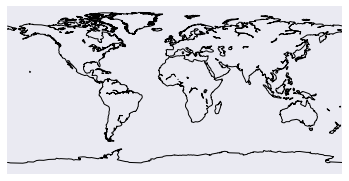

In [241]:
map = Basemap()

map.drawcoastlines()

In [242]:
import matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

dat = shapefile.Reader("./data/county_shapefiles/cb_2014_us_county_5m.shp")
states = set([i[2] for i in dat.iterRecords()])

from bokeh.plotting import *
output_file("india_states.html")


TOOLS="pan,wheel_zoom,box_zoom,reset,previewsave"
figure(title="Map of US", tools=TOOLS, plot_width=900, plot_height=800)

for state_name in states:
    data = getDict(state_name, dat)
    patches(data[state_name]['lat_list'], data[state_name]['lng_list'], line_color="black")

plt.show()


def getParts ( shapeObj ):

    points = []

    num_parts = len( shapeObj.parts )
    end = len( shapeObj.points ) - 1
    segments = list( shapeObj.parts ) + [ end ]

    for i in range( num_parts ):
        points.append( shapeObj.points[ segments[i]:segments[i+1] ] )
    return points


def getDict ( state_name, shapefile ):

    stateDict = {state_name: {} }

    rec = []
    shp = []
    points = []

    for i in shapefile.shapeRecords( ):

        if i.record[2] == state_name:
            rec.append(i.record)
            shp.append(i.shape)
            
        total_area = sum( [float(i[0]) for i in rec] ) / (1000*1000)


        for j in shp:
            for i in getParts(j):
                  points.append(i)

        lat = []
        lng = []
        for i in points:
            lat.append( [j[0] for j in i] )
            lng.append( [j[1] for j in i] )


        stateDict[state_name]['lat_list'] = lat
        stateDict[state_name]['lng_list'] = lng
        stateDict[state_name]['total_area'] = total_area

    return stateDict





TypeError: 'module' object is not callable